# Data Visualization Demonstration: Immigration to Germany
#### This dataset contains information pertaining to international migration flows from selected countries to Germany between 1980 and 2014 as reported to the United Nations Population Division.

###### Reporting country: Germany
###### Criterion: Citizenship

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from pandas import read_excel
import seaborn as sns

In [2]:
!conda install -c anaconda xlrd --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         156 KB  anaconda

The following packages will be UPDATED:

    certifi: 2019.11.28-py36_0 conda-forge --> 2019.11.28-py36_0 anaconda
    openssl: 1.1.1d-h516909a_0 conda-forge --> 1.1.1-h7b6447c_0  anaconda


certifi-2019.11.28   | 156 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [3]:
df_ger = pd.read_excel('Germany.xlsx',
                       sheet_name='Germany by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
df_ger.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Emigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,585,...,1908,1700,1615,1184,1510,..,..,..,..,..
1,Emigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,0,...,1059,864,735,683,829,..,..,..,..,..
2,Emigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,842,...,2373,1730,1420,1312,1352,..,..,..,..,..
3,Emigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,6,3,1,4,1,..,..,..,..,..
4,Emigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,0,...,452,456,372,464,441,..,..,..,..,..


In [5]:
dfger2=df_ger.drop(df_ger.index[0:192])
dfger2.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
192,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,5281,...,2313,1600,1505,1359,1855,..,..,..,..,..
193,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,0,...,1355,1261,1139,1106,1046,..,..,..,..,..
194,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,741,...,2204,1604,1411,1372,1381,..,..,..,..,..
195,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,6,3,2,4,2,..,..,..,..,..
196,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,0,...,366,330,327,381,348,..,..,..,..,..


In [6]:
print(dfger2.shape) 

(191, 43)


In [7]:
#dfger2.drop(['Germany'])

dfger2.loc[dfger2['OdName'] == 'Germany']

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
256,Immigrants,Citizens,Germany,908,Europe,926,Western Europe,901,Developed regions,104929,...,177993,128051,103388,106014,108331,79165,85527,89438,87245,83229


In [8]:
dfger3=dfger2.drop(df_ger.index[256])
dfger3.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
192,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,5281,...,2313,1600,1505,1359,1855,..,..,..,..,..
193,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,0,...,1355,1261,1139,1106,1046,..,..,..,..,..
194,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,741,...,2204,1604,1411,1372,1381,..,..,..,..,..
195,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,6,3,2,4,2,..,..,..,..,..
196,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,0,...,366,330,327,381,348,..,..,..,..,..


In [9]:
dfger3.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
dfger3.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
dfger3.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
192,Afghanistan,Asia,Southern Asia,Developing regions,5281,5162,2416,846,1081,2238,...,2313,1600,1505,1359,1855,..,..,..,..,..
193,Albania,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,1355,1261,1139,1106,1046,..,..,..,..,..
194,Algeria,Africa,Northern Africa,Developing regions,741,744,555,635,563,684,...,2204,1604,1411,1372,1381,..,..,..,..,..
195,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,6,3,2,4,2,..,..,..,..,..
196,Angola,Africa,Middle Africa,Developing regions,0,0,0,0,0,0,...,366,330,327,381,348,..,..,..,..,..


In [10]:
all(isinstance(column, str) for column in dfger3.columns)

False

In [11]:
dfger3.columns = list(map(str, dfger3.columns))

all(isinstance(column, str) for column in dfger3.columns)

True

In [12]:
dfger3.set_index('Country', inplace=True)

In [13]:
dfger3['Total'] = dfger3.sum(axis=1)

In [14]:
print ('data dimensions:', dfger3.shape)

data dimensions: (190, 38)


In [15]:
years = list(map(str, range(2001, 2009)))
years

['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008']

## Area Plots aka Stacked Line Plot or Area Plot

In [16]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


In [17]:

dfger3.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5=dfger3.head()

# transpose the dataframe
df_top5=df_top5[years].transpose() 

df_top5.head(15)

Country,Poland,Turkey,Italy,Romania,Greece
2001,79033,54695,28787,20142,16153
2002,81551,58128,25011,23953,14957
2003,88241,49774,21634,23780,12146
2004,125042,42644,19550,23545,10205
2005,147716,36019,18349,23274,8975
2006,152733,30720,18293,23743,8289
2007,140870,27599,18624,43894,7892
2008,119867,26653,20087,48225,8266


#### Line Plot

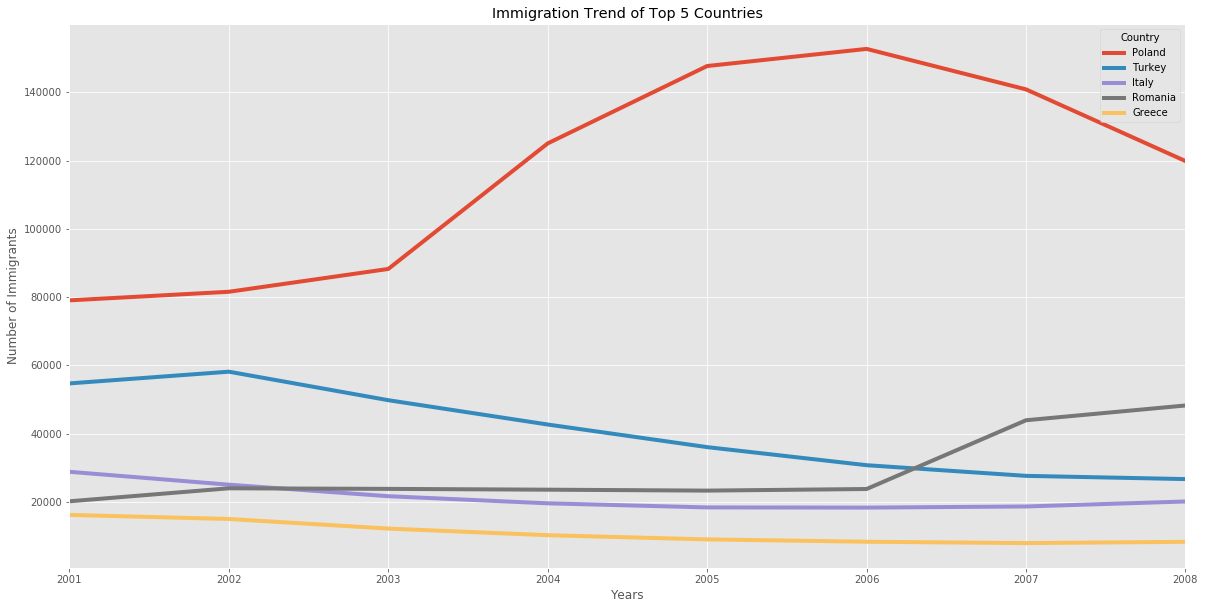

In [18]:
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='line',linewidth=4, figsize=(20, 10)) # pass a tuple (x, y) size
#plt.style.use('dark_background')
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

#### Unstacked Area Plot

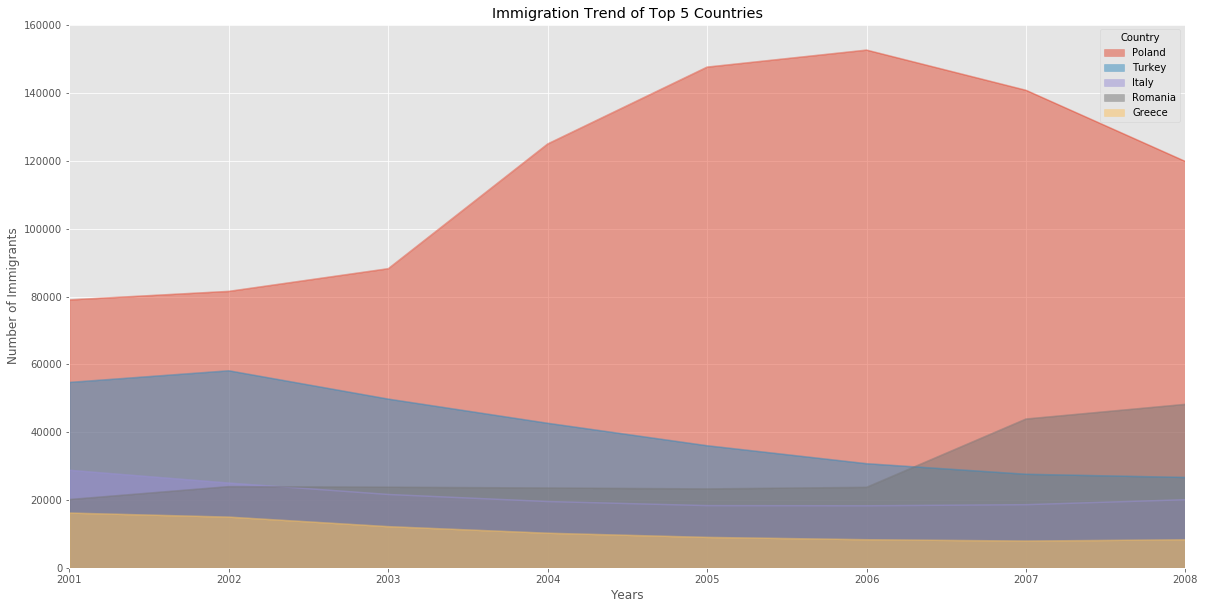

In [19]:
# Option 1
df_top5.index = df_top5.index.map(int) # change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size           
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

#### Stacked Area Plot

Text(0.5, 0, 'Years')

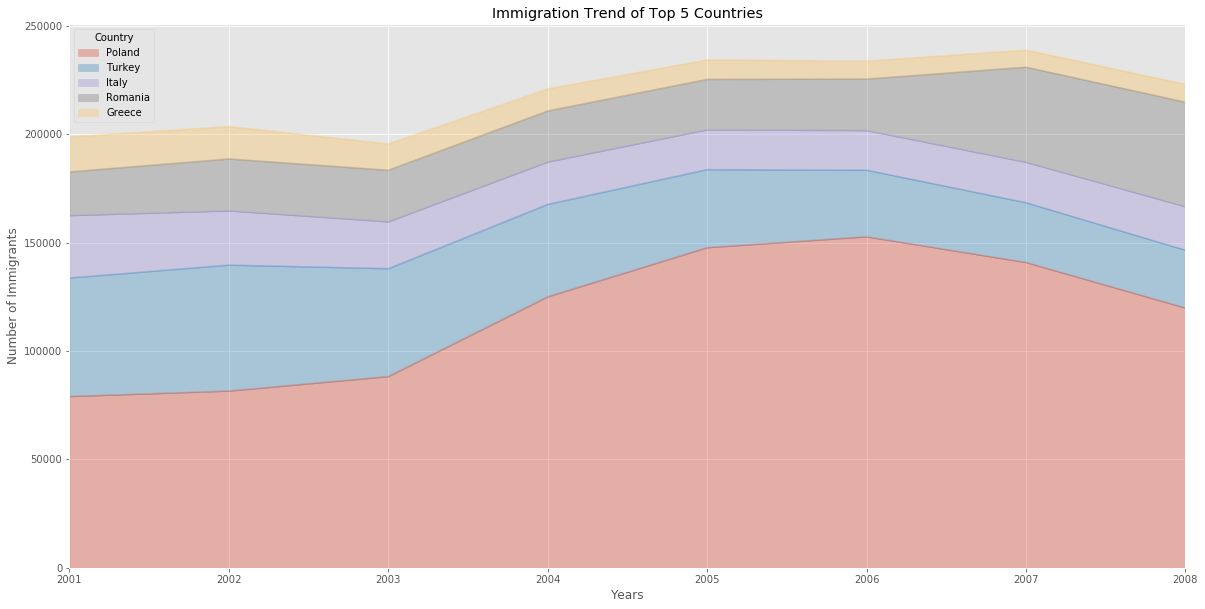

In [20]:
# Artist layer (Object oriented method) - using an Axes instance from Matplotlib
# Option 2: preferred option with more flexibility
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

#### Bar Plots

In [21]:
#prepare Poland data 
df_poland = dfger3.loc['Poland', years]
df_poland.head()

2001     79033
2002     81551
2003     88241
2004    125042
2005    147716
Name: Poland, dtype: object

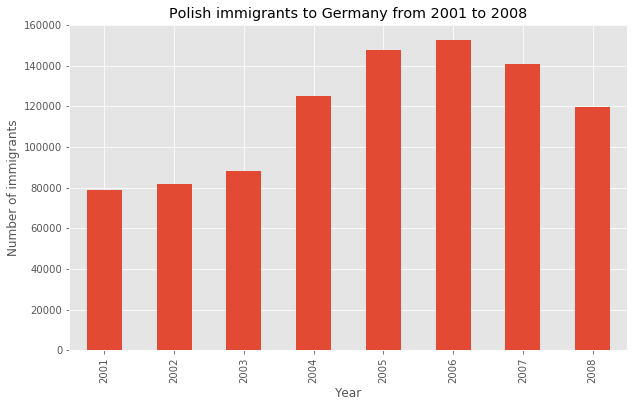

In [22]:
# Plot data
df_poland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Polish immigrants to Germany from 2001 to 2008') # add title to the plot

plt.show()

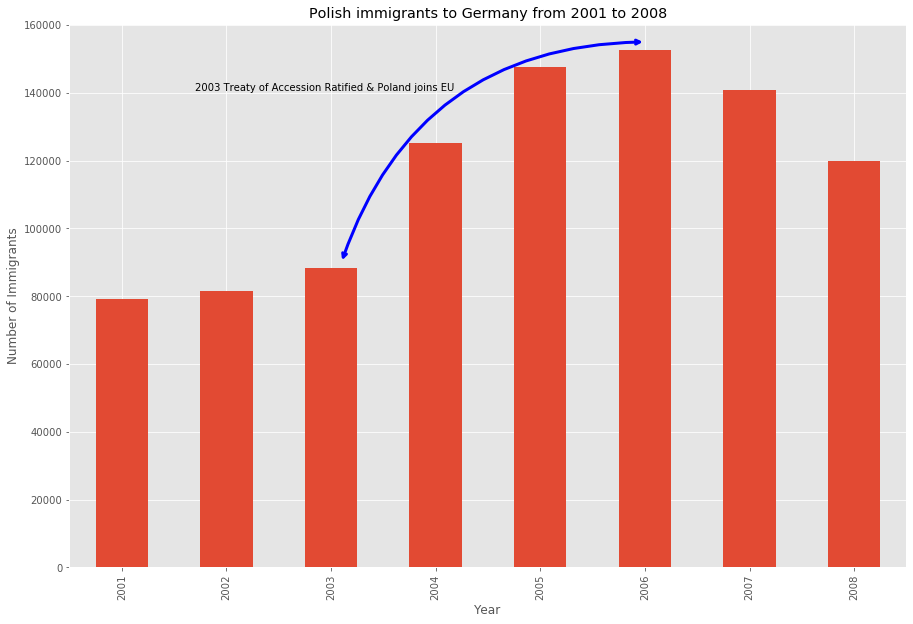

In [23]:
df_poland.plot(kind='bar', figsize=(15, 10), rot=90) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Polish immigrants to Germany from 2001 to 2008')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(2.1, 90000),             # place head of the arrow at point (year 2006 , pop 150000)
             xytext=(5, 155000),         # place base of the arrow at point (year 2003 , pop 90000)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='<->', connectionstyle='arc3, rad=0.35', color='blue', lw=3)
            )

# Annotate Text
plt.annotate('2003 Treaty of Accession Ratified & Poland joins EU', # text to display
             xy=(0.7, 140000),                    # start the text at at point (year 2008 , pop 30)
             rotation=0,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

In [24]:
# get top 15 countries
df_top15 = dfger3['Total'].head(15)
df_top15

Country
Poland                                                  1987946
Turkey                                                  1361137
Italy                                                    806842
Romania                                                  536776
Greece                                                   346673
United States of America                                 314008
Russian Federation                                       303860
Bosnia and Herzegovina                                   297262
United Kingdom of Great Britain and Northern Ireland     287995
Hungary                                                  264402
Austria                                                  259124
France                                                   231166
Portugal                                                 193623
Iran (Islamic Republic of)                               185455
Czech Republic                                           161040
Name: Total, dtype: int64

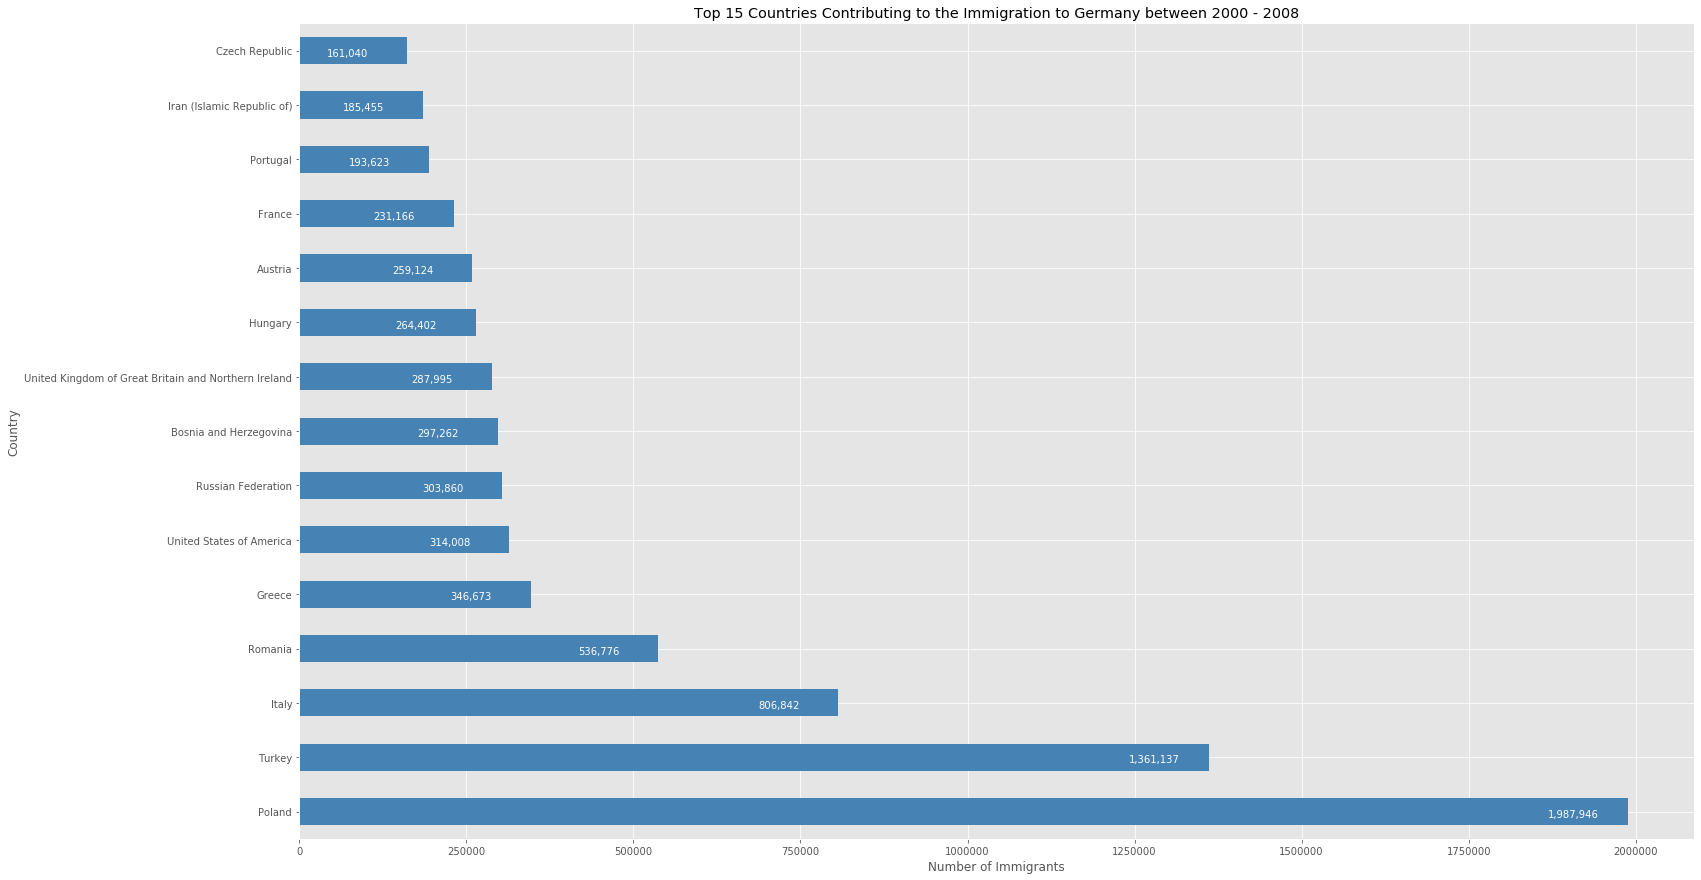

In [25]:
df_top15.plot(kind='barh', figsize=(25, 15), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Countries Contributing to the Immigration to Germany between 2000 - 2008')
# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 120000, index - 0.10), color='white')

plt.show()

#### Histogram Plot (Basic)

In [26]:
# create a dataframe of the countries of interest 
df_PTU = dfger3.loc[['Poland', 'Turkey', 'United States of America'], years]
df_PTU = df_PTU.transpose()
df_PTU

Country,Poland,Turkey,United States of America
2001,79033,54695,15979
2002,81551,58128,15466
2003,88241,49774,14666
2004,125042,42644,15292
2005,147716,36019,15228
2006,152733,30720,15435
2007,140870,27599,16660
2008,119867,26653,17542


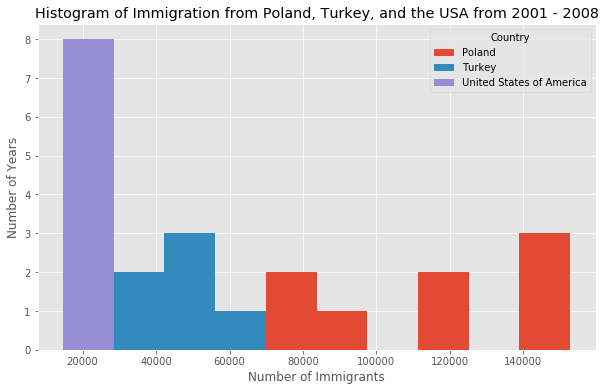

In [27]:
df_PTU.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Poland, Turkey, and the USA from 2001 - 2008')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

#### Regression plot

In [28]:
# install seaborn
#!conda install -c anaconda seaborn --yes
#! pip install seaborn
# import library
#import seaborn as sns
#print('Seaborn installed and imported!')

In [29]:
years2 = list(map(str, range(1980, 1998)))
# we can use the sum() method to get the total population per year
df_total = pd.DataFrame(dfger3[years2].sum(axis=0))

# change the years to type float (useful for regression later on)
df_total.index = map(float, df_total.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_total.reset_index(inplace=True)

# rename columns
df_total.columns = ['year', 'total']

# view the final dataframe
df_total.head()

,year,total
0,1980.0,579606
1,1981.0,459038
2,1982.0,294089
3,1983.0,252834
4,1984.0,307544


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


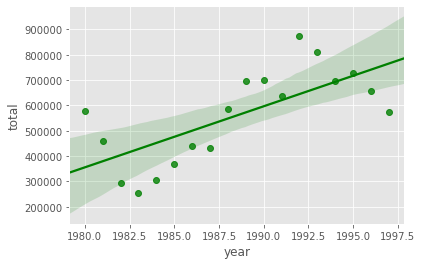

In [30]:
ax = sns.regplot(x='year', y='total', data=df_total, color='green')

Text(0.5, 1.0, 'Total Immigration to Germany from 1980 - 1998')

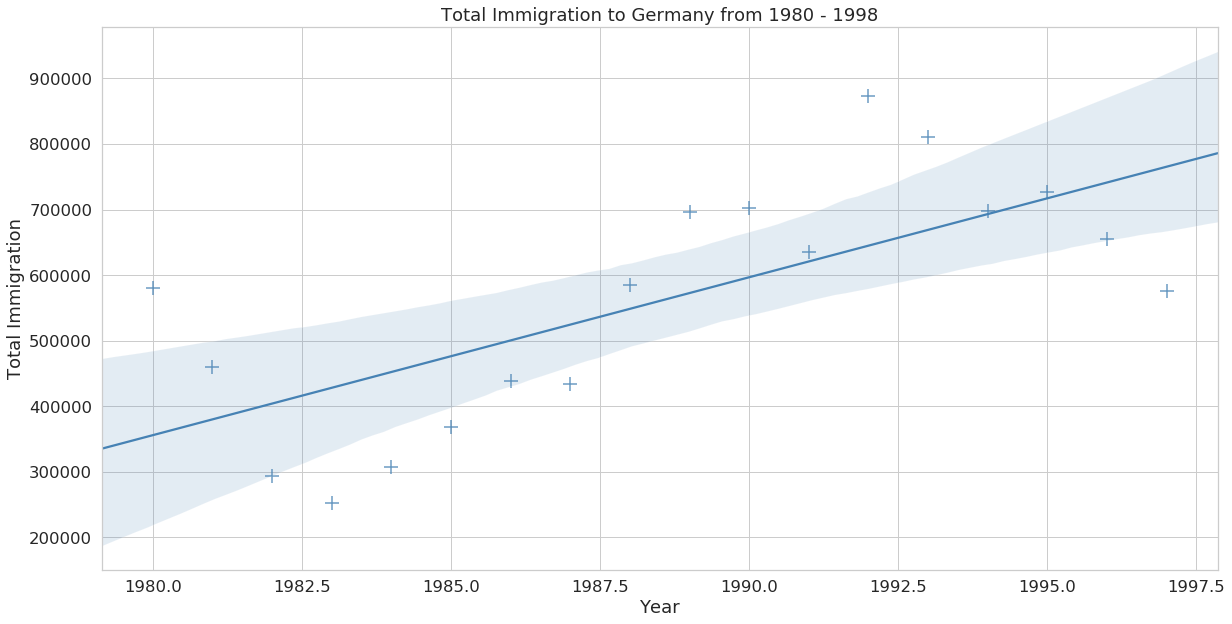

In [31]:
plt.figure(figsize=(20, 10))

sns.set(font_scale=1.5)
#sns.set_style('ticks') # change background to white background
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_total, color='steelblue', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Germany from 1980 - 1998')

### Maps

In [32]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge

The following packages will be UPDATED:

    certifi: 2019.11.28-py36_0 anaconda --> 2019.11.28-py36_0 conda-forge

The following packages will be DOWNGRADED:

    openssl: 1.1.1-h7b6447c_0  anaconda --> 1.1.1d-h516909a_0 conda-forge


certifi-2019.11.28   | 149 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Folium installed and imported!


In [33]:
dfger4=dfger2.drop(df_ger.index[256])

# clean up the dataset to remove unnecessary columns (eg. REG) 
dfger4.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
dfger4.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
dfger4.columns = list(map(str, dfger4.columns))

# add total column
dfger4['Total'] = dfger4.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', dfger4.shape)

data dimensions: (190, 39)


#### Stamen Terrain Map 

In [34]:
world_map = folium.Map()
Germany_Coordinates= (51.1657, 10.4515)
Germany_map=folium.Map(location=Germany_Coordinates, zoom_start=5.6,tiles='Stamen Terrain')
display(Germany_map)


#### Choropleth Map

In [35]:
# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [36]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
#world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

In [37]:
#world_geo = r'world_countries.json'

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(dfger4['Total'].min(),
                              dfger4['Total'].max(),
                              6, dtype=int)

threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
world_map.choropleth(
    geo_data=world_geo,
    data=dfger4,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.9, 
    line_opacity=0.2,
    legend_name='Immigration to Germany',
    reset=True
)
world_map

#### Pie Chart

In [38]:
# Group countries by continents and apply sum() function 
df_continents = dfger3.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(dfger3.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,2008,Total
Continent,,,,,,,,,,,,,,,,,,,,
Africa,20149,18155,14030,11742,14406,18737,22581,15955,19065,25596,17249,48389,69767,53533,34125,33212,36658,33500,22037,528886
Asia,273469,132402,79328,60444,80137,125278,161574,116363,138806,157627,160579,163883,171812,176468,163240,186253,187634,161950,111854,2809101
Europe,259594,283652,176983,157434,188705,197516,227557,274588,398987,483168,498126,388281,595039,548732,470096,476978,398029,348162,394702,6766329
Latin America and the Caribbean,7001,7055,6829,6218,5873,6197,6764,7018,7919,9473,5004,11286,11028,10597,10673,11598,12949,12482,17364,173328
Northern America,17812,16473,15781,15954,17307,18610,19229,18008,18430,19151,20883,21308,22622,18486,17038,17235,17435,16997,20404,349163


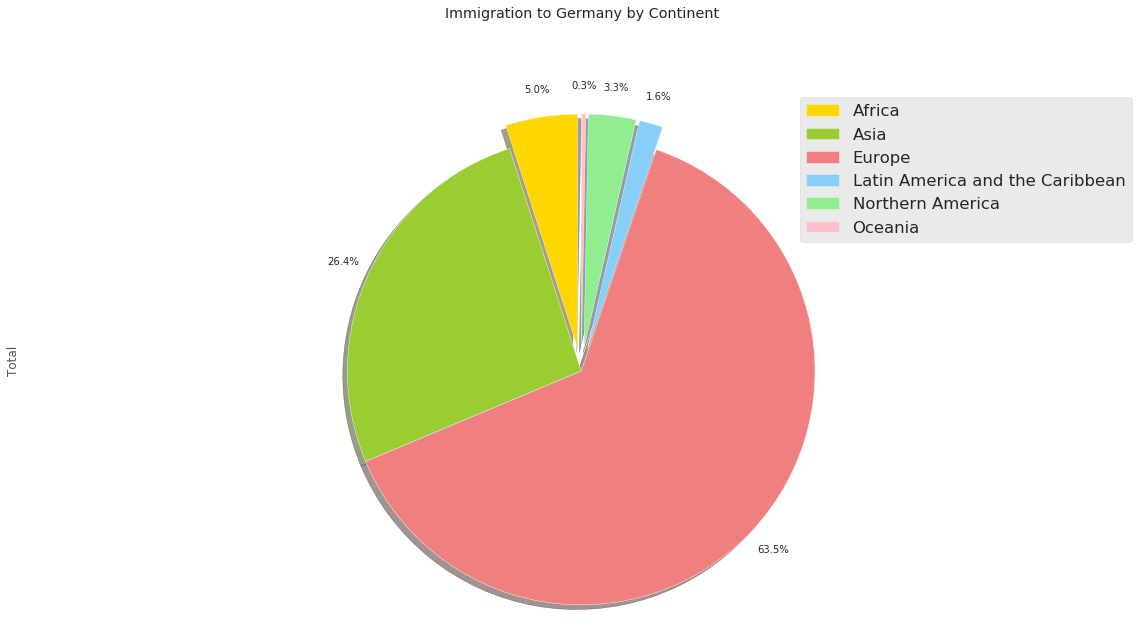

In [48]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0.1, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(20, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.12,    
                            colors=colors_list,  
                            explode=explode_list 
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Germany by Continent', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper right')

plt.show()

### Waffle Chart

In [40]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


In [41]:
# Create a new dataframe for these three countries 
df_waffle = dfger3.loc[['Egypt', 'Algeria', 'Afghanistan'], :]

# Display new dataframe
df_waffle

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Egypt,Africa,Northern Africa,Developing regions,2318,2041,1669,1504,1455,1485,1639,...,1453,1674,2063,1847,..,..,..,..,..,37506
Algeria,Africa,Northern Africa,Developing regions,741,744,555,635,563,684,625,...,1604,1411,1372,1381,..,..,..,..,..,40085
Afghanistan,Asia,Southern Asia,Developing regions,5281,5162,2416,846,1081,2238,2999,...,1600,1505,1359,1855,..,..,..,..,..,82990


In [42]:
# Compute the proportion of each category with respect to the total
total_values = sum(df_waffle['Total'])
category_proportions = [(float(value) / total_values) for value in df_waffle['Total']]

# Print out proportions
for i, proportion in enumerate(category_proportions):
    print (df_waffle.index.values[i] + ': ' + str(proportion))

Egypt: 0.23356436938367553
Algeria: 0.24962479994519898
Afghanistan: 0.5168108306711254


In [43]:
# Define chart dimensions
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


In [44]:
# Compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# Print number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (df_waffle.index.values[i] + ': ' + str(tiles))

Egypt: 93
Algeria: 100
Afghanistan: 207


In [45]:
# Initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# Define indices to loop through waffle chart
category_index = 0
tile_index = 0

# Populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # If the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # Set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')
waffle_chart

Waffle chart populated!


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
   

<Figure size 432x288 with 0 Axes>

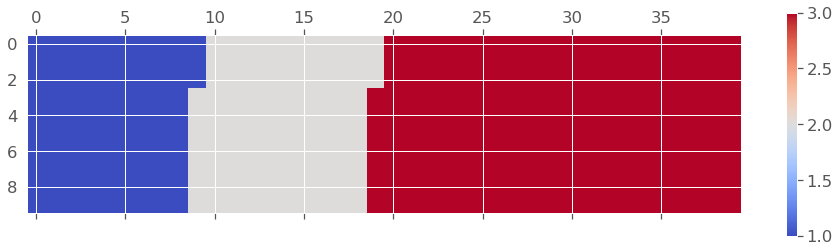

In [46]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

<Figure size 432x288 with 0 Axes>

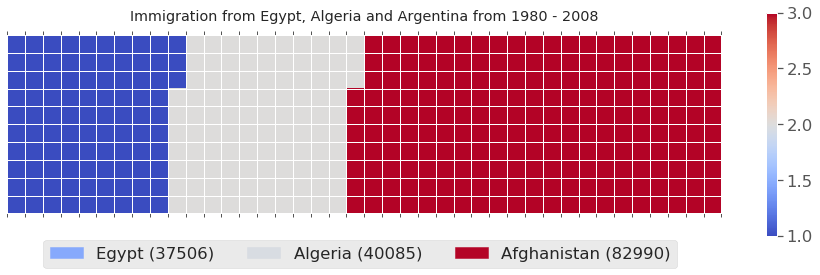

In [47]:
# Beautify waffle chart and add legend

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

ax.set_title('Immigration from Egypt, Algeria and Argentina from 1980 - 2008')
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=1)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_waffle['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_waffle.index.values):
    label_str = category + ' (' + str(df_waffle['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='best', 
           ncol=len(df_waffle.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

### End of Demo